In [6]:
import csv
import matplotlib.pyplot as plt

# 윈도우 ver
f = open('LOCAL_PEOPLE_DONG_201912.csv', encoding = 'utf8')
data = csv.reader(f)
next(data)
data = list(data)
print(len(data))

f2 = open('dong_code.csv', encoding = 'utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)
print(len(code_data))

315456
424


In [7]:
gu = input('자치구를 입력하세요 : ')

# 입력된 자치구에 해당하는 모든 행정동을 보여주기
for row in code_data : 
    if row[-2] == gu : 
        print(row[-1])
        
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 : ')
for row in code_data : 
    if row[-1] == dong_name : 
        dong_code = row[1]
        
print(dong_name, '-',dong_code,'를 분석합니다!')

자치구를 입력하세요 : 강남구
신사동
논현1동
논현2동
삼성1동
삼성2동
대치1동
대치4동
역삼1동
역삼2동
도곡1동
도곡2동
개포1동
개포4동
일원본동
일원1동
일원2동
수서동
세곡동
압구정동
청담동
대치2동
개포2동
핫플레이스가 위치한 행정동을 입력하세요 : 압구정동
압구정동 - 11680545 를 분석합니다!


## 1. 시간대별 평균인구 그래프 그리기

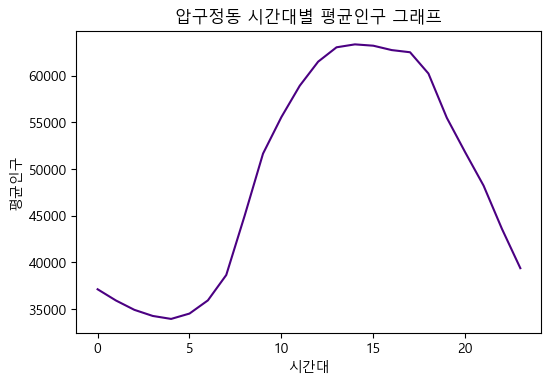

In [11]:
population = [0 for i in range(24)]

for row in data : 
    if row[2] == dong_code : 
        time = int(row[1])
        p = float(row[3])
        population[time] += p

population = [p/31 for p in population]

plt.figure(dpi=100)
plt.rc('font', family='Malgun Gothic')
plt.title(dong_name+' 시간대별 평균인구 그래프')
plt.plot(range(24), population, color='indigo')
plt.xlabel('시간대')
plt.ylabel('평균인구')
plt.show()

## 2. 평일, 주말 시간대별 인구 그래프 그리기

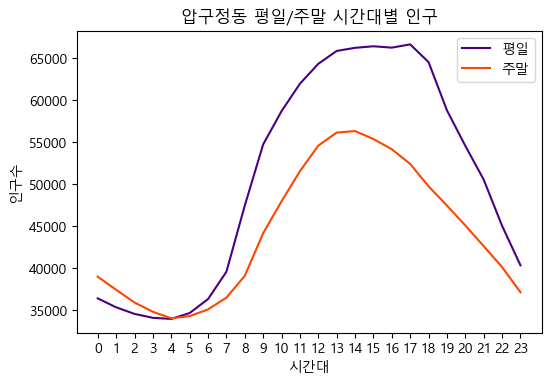

In [13]:
import datetime

weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data : 
    if row[2] == dong_code : 
        time = int(row[1])
        p = float(row[3])
        year = int(row[0][:4])
        mon = int(row[0][4:6])
        day = int(row[0][6:])
        num = datetime.date(year, mon, day).weekday()
        
        if num < 5 : 
            weekday[time] += p
        else : 
            weekend[time] += p

weekday = [w/22 for w in weekday]
weekend = [w/9 for w in weekend]

plt.figure(dpi=100)
plt.title(dong_name+ ' 평일/주말 시간대별 인구')
plt.rc('font', family='Malgun Gothic')
plt.plot(weekday, color = 'indigo', label = '평일')
plt.plot(weekend, color = 'orangered', label = '주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('인구수')
plt.xticks(range(24), range(24))
plt.show()


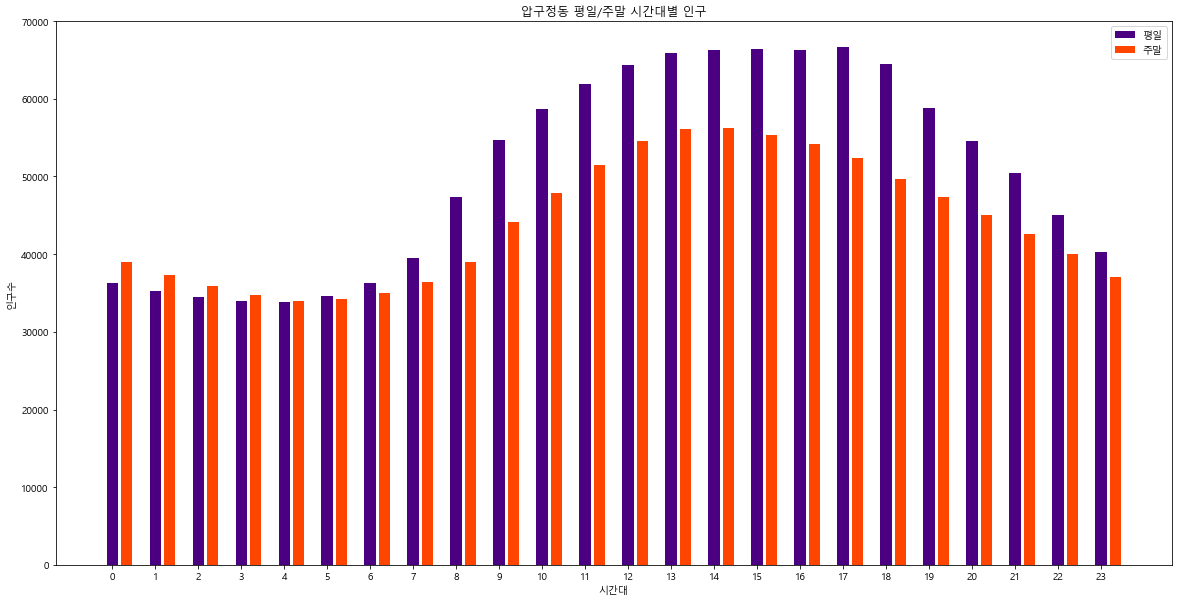

In [16]:
plt.figure(figsize=(20,10))
plt.title(dong_name+ ' 평일/주말 시간대별 인구')
plt.rc('font', family = 'Malgun Gothic')
plt.bar(range(0,72,3), weekday, color = 'indigo', label = '평일')
plt.bar(range(1,73,3), weekend, color = 'orangered', label = '주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('인구수')
plt.xticks(range(0,72,3), range(24))
plt.show()

## 3. 남녀 시간대별 인구 그래프 

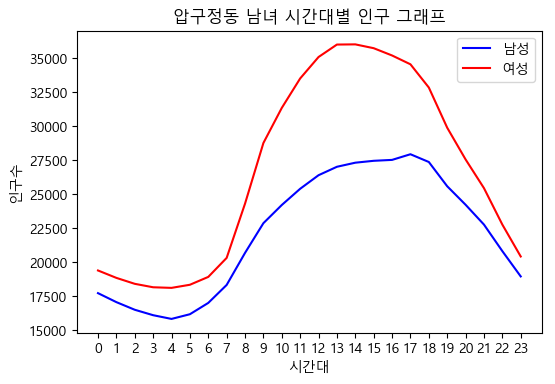

In [17]:
male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data : 
    if row[2] == dong_code : 
        time = int(row[1])
        
        m = 0
        for i in range(4,18) : 
            m += float(row[i])
        male[time] += m
        
        f = 0
        for i in range(18,32) : 
            f += float(row[i])
        female[time] += f
            
male = [m/31 for m in male]
female = [f/31 for f in female]

import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.rc('font', family='Malgun Gothic')
plt.title(dong_name+' 남녀 시간대별 인구 그래프')
plt.plot(male, color = 'b', label ='남성')
plt.plot(female, color = 'r', label = '여성')
plt.xlabel('시간대')
plt.ylabel('인구수')
plt.legend()
plt.xticks(range(24), range(24))
plt.show()

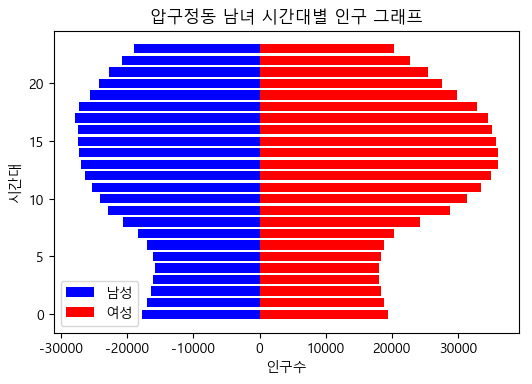

In [18]:
import matplotlib

male = [-m for m in male]

matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=100)
plt.rc('font', family='Malgun Gothic')
plt.title(dong_name+' 남녀 시간대별 인구 그래프')
plt.barh(range(24), male, color = 'b', label ='남성')
plt.barh(range(24), female, color = 'r', label = '여성')
plt.xlabel('인구수')
plt.ylabel('시간대')
plt.legend()
plt.show()

## 4. 연령별 시간대 인구 그래프

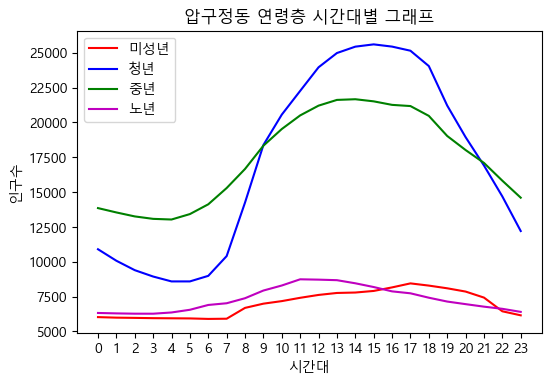

In [19]:
age_under20 = [0 for i in range(24)]
age_2040    = [0 for i in range(24)]
age_4065    = [0 for i in range(24)]
age_65      = [0 for i in range(24)]

for row in data : 
    if row[2] == dong_code : 
        time = int(row[1])
        
        for i in range(4,32) : 
            if 4 <= i%14 <= 6 : 
                age_under20[time] += float(row[i])
            elif 7 <= i%14 <= 10 : 
                age_2040[time] += float(row[i])
            elif (11 <= i%14) or (i%14 <= 1) : 
                age_4065[time] += float(row[i])
            elif 2 <= i%14 <= 3 : 
                age_65[time] += float(row[i])

age_under20 = [a/31 for a in age_under20]
age_2040    = [a/31 for a in age_2040]
age_4065    = [a/31 for a in age_4065]
age_65      = [a/31 for a in age_65]                

plt.figure(dpi=100)
plt.title(dong_name+ ' 연령층 시간대별 그래프')
plt.plot(age_under20, color = 'r', label ='미성년')
plt.plot(age_2040, color = 'b', label = '청년')
plt.plot(age_4065, color = 'g', label ='중년')
plt.plot(age_65, color ='m', label ='노년')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('인구수')
plt.xticks(range(24), range(24))
plt.show()

## 5. 익숙한 지역과 비교하기

In [20]:
# 비교할 행정동
gu2 = input('비교할 자치구를 입력하세요 : ')
for row in code_data : 
    if row[-2] == gu2 : 
        print(row[-1])
        
dong_name2 = input('비교할 행정동을 입력하세요 : ')
for row in code_data : 
    if row[-1] == dong_name2 : 
        dong_code2 = row[1]

비교할 자치구를 입력하세요 : 양천구
목1동
목2동
목3동
목4동
신월1동
신월2동
신월3동
신월4동
신월5동
신월6동
신월7동
신정1동
신정2동
신정3동
신정6동
신정7동
목5동
신정4동
비교할 행정동을 입력하세요 : 신정4동


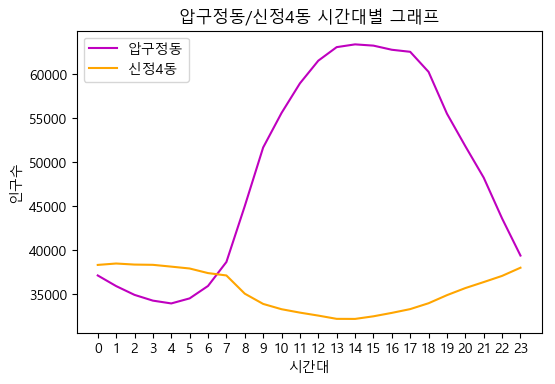

In [22]:
population = [0 for i in range(24)]
population2 = [0 for i in range(24)]

for row in data : 
    if row[2] == dong_code : 
        time = int(row[1])
        p = float(row[3])
        population[time] += p
    elif row[2] == dong_code2 : 
        time = int(row[1])
        p = float(row[3])
        population2[time] += p

population = [p/31 for p in population]
population2 = [p/31 for p in population2]

plt.figure(dpi=100)
plt.title(dong_name+'/'+dong_name2+' 시간대별 그래프')
plt.plot(population, color = 'm', label = dong_name)
plt.plot(population2, color = 'orange', label = dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('인구수')
plt.xticks(range(24), range(24))
plt.show()